<a href="https://colab.research.google.com/github/BHariKrishnaReddy/Kaggle/blob/main/diabetes_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dataprep

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from dataprep.eda import create_report
from dataprep.eda import plot_missing
from dataprep.eda import plot_correlation
from dataprep.eda import plot

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('diabetes.csv',decimal=",")
df = data.copy()df.head()

patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
0               1          193       77        49             3.9   19   
1               2          146       79        41             3.6   19   
2               3          217       75        54             4.0   20   
3               4          226       97        70             3.2   20   
4               5          164       91        67             2.4   20   

   gender  height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0  female      61     119  22.5          118            70     32   38   
1  female      60     135  26.4          108            58     33   40   
2  female      67     187  29.3          110            72     40   45   
3  female      64     114  19.6          122            64     31   39   
4  female      70     141  20.2          122            86     32   39   

   waist_hip_ratio     diabetes  
0             0.84  No diabetes  
1             0.83  No diabetes  
2             0.89  No diabetes  
3             0.79  No diabetes  
4             0.82  No diabetes

  0%|          | 0/193 [00:00<?, ?it/s]


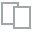
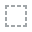
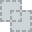
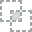
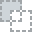
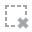
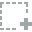
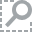
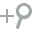
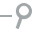
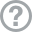
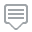
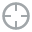
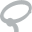
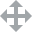
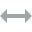
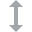
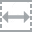
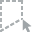
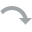
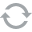
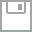
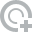
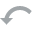
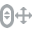
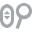
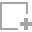
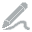
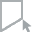
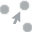
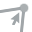
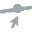

In [ ]:
plot_missing(df)

In [ ]:
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')

There is 390 rows
There is 16 columns


In [ ]:
# Eliminate duplicates
print('There are' , df.duplicated().sum() , 'duplicates')
df.loc[df.duplicated(keep=False),:]
df.drop_duplicates(keep='first',inplace=True)
print('There is now' , df.shape[0] , 'rows')
print('There is now' , df.shape[1] , 'columns')

There are 0 duplicates
There is now 390 rows
There is now 16 columns


  0%|          | 0/2872 [00:00<?, ?it/s]

DataPrep Report
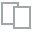
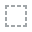
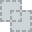
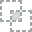
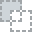
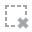
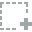
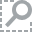
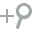
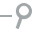
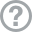
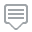
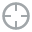
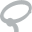
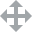
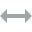
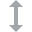
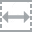
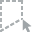
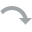
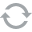
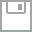
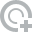
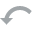
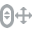
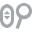
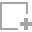
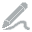
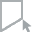
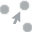
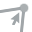
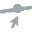

In [ ]:
create_report(df)

# Analysing freatures and target

In [ ]:
df['diabetes'].value_counts(normalize=True) #Classes déséquilibrées

No diabetes    0.846154
Diabetes       0.153846
Name: diabetes, dtype: float64

We have to resample the whole dataset here beacause it is unbalanced

In [ ]:
for col in df.select_dtypes("object"):
    print(f'{col :-<50} {df[col].unique()}')

gender-------------------------------------------- ['female' 'male']
diabetes------------------------------------------ ['No diabetes' 'Diabetes']


# A bit of data engineering ...

In [ ]:
df=data.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head()

patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
0               1          193       77        49             3.9   19   
1               2          146       79        41             3.6   19   
2               3          217       75        54             4.0   20   
3               4          226       97        70             3.2   20   
4               5          164       91        67             2.4   20   

   gender  height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0  female      61     119  22.5          118            70     32   38   
1  female      60     135  26.4          108            58     33   40   
2  female      67     187  29.3          110            72     40   45   
3  female      64     114  19.6          122            64     31   39   
4  female      70     141  20.2          122            86     32   39   

   waist_hip_ratio     diabetes  
0             0.84  No diabetes  
1             0.83  No diabetes  
2             0.89  No diabetes  
3             0.79  No diabetes  
4             0.82  No diabetes

In [ ]:
def encoding(df):
    code = {'female':1,
            'male':0,
            'No diabetes':1,
            'Diabetes':0
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)        
    return df

def imputation(df):
    df = df.dropna(axis=0)
    return df

def feature_engineering(df):
    useless_columns = ['patient_number']
    df = df.drop(useless_columns,axis=1)
    return df

def preprocessing(df):
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('diabetes',axis=1)
    y = df['diabetes']    

    return df,X,y

In [ ]:
df,_,_ = preprocessing(df)
df.head()

cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  gender  height  \
0          193       77        49             3.9   19       1      61   
1          146       79        41             3.6   19       1      60   
2          217       75        54             4.0   20       1      67   
3          226       97        70             3.2   20       1      64   
4          164       91        67             2.4   20       1      70   

   weight   bmi  systolic_bp  diastolic_bp  waist  hip  waist_hip_ratio  \
0     119  22.5          118            70     32   38             0.84   
1     135  26.4          108            58     33   40             0.83   
2     187  29.3          110            72     40   45             0.89   
3     114  19.6          122            64     31   39             0.79   
4     141  20.2          122            86     32   39             0.82   

   diabetes  
0         1  
1         1  
2         1  
3         1  
4         1

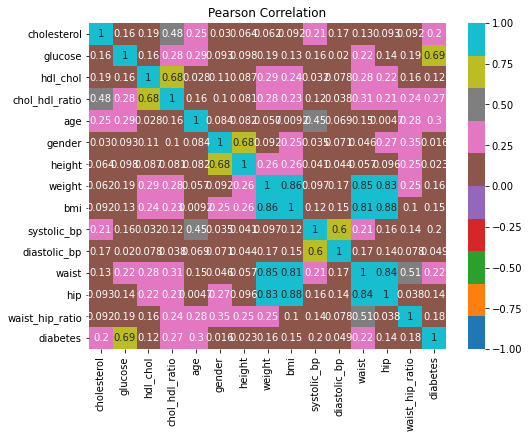

gender             0.015531
height             0.023466
diastolic_bp       0.049351
hdl_chol           0.123133
hip                0.143792
bmi                0.145274
weight             0.162987
waist_hip_ratio    0.175623
systolic_bp        0.198600
cholesterol        0.204262
waist              0.223378
chol_hdl_ratio     0.272987
age                0.301995
glucose            0.689080
diabetes           1.000000
Name: diabetes, dtype: float64


In [ ]:
corr = df.corr(method='pearson').abs()

fig = plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='tab10', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

print (df.corr()['diabetes'].abs().sort_values())

# Modelling

In [ ]:
df = data.copy()
df,X,y=preprocessing(df)
df['diabetes'].value_counts(normalize=True) #Classes déséquilibrées

1    0.846154
0    0.153846
Name: diabetes, dtype: float64

<h2 id="t4" style="margin-bottom: 18px">Resampling</h2>

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Let's implement a basic example, which uses the <code>DataFrame.sample</code> method to get random samples each class:

In [ ]:
# Class count
count_class_0, count_class_1 = df['diabetes'].value_counts()

# Divide by class
df_class_0 = df[df['diabetes'] == 1]
df_class_1 = df[df['diabetes'] == 0]

print(count_class_0)
print(count_class_1)

330
60


Random under-sampling:
0    60
1    60
Name: diabetes, dtype: int64


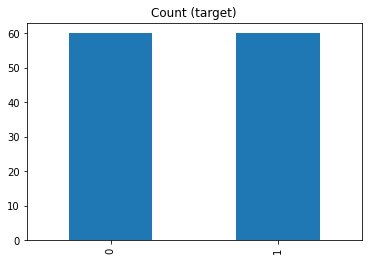

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1,random_state=42)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under['diabetes'].value_counts())

df_under['diabetes'].value_counts().plot(kind='bar', title='Count (target)');

## Creating train and test sets

In [ ]:
trainset, testset = train_test_split(df_under, test_size=0.2, random_state=42)
print(trainset['diabetes'].value_counts())
print(testset['diabetes'].value_counts())

0    49
1    47
Name: diabetes, dtype: int64
1    13
0    11
Name: diabetes, dtype: int64


In [ ]:
X_train = trainset.drop(['diabetes'],axis=1)
y_train = trainset['diabetes']
X_test = testset.drop(['diabetes'],axis=1)
y_test = testset['diabetes']

## Creating models

In [ ]:
preprocessor = make_pipeline(MinMaxScaler())

PCAPipeline = make_pipeline(StandardScaler(), PCA(n_components=3,random_state=42))

RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=42))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=42))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=42,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression(solver='sag',random_state=42))

## PCA Analysis

In [ ]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X))
PCA_df = pd.concat([PCA_df, y], axis=1)
PCA_df.head()

0         1         2  diabetes
0 -2.626750 -1.524803 -0.554678         1
1 -2.251150 -2.305271 -1.608217         1
2 -0.139991 -1.388669 -1.401565         1
3 -3.216131 -1.409299 -0.101757         1
4 -2.746162 -0.810267 -0.751869         1

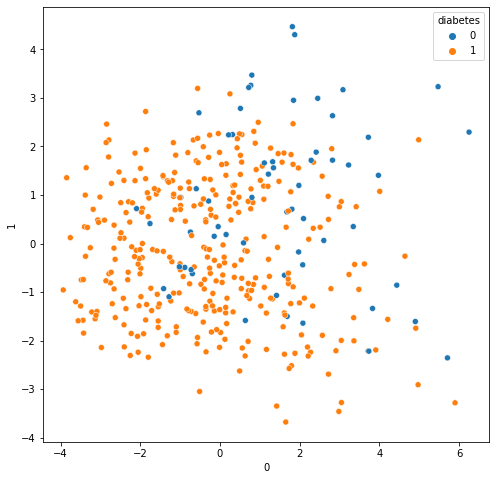

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(PCA_df[0],PCA_df[1],hue=PCA_df['diabetes'],palette=sns.color_palette("tab10", 2))
plt.show()

In [ ]:
import plotly.express as px
figure1 = px.scatter_3d(PCA_df,
        x=0, 
        y=1, 
        z=2, 
        color = 'diabetes',
                       width=600, height=800)
figure1.update_traces(marker=dict(size=5,
                              line=dict(width=0.2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

figure1.show()

# Training models
## Models overview

In [ ]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline}

In [ ]:
def evaluation(model):
    model.fit(X_train, y_train)
    # calculating the probabilities
    y_pred_proba = model.predict_proba(X_test)

    # finding the predicted valued
    y_pred = np.argmax(y_pred_proba,axis=1)
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('-')
    print(confusion_matrix(y_test,y_pred))
    print('-')
    print(classification_report(y_test,y_pred))
    print('-')
    
    N, train_score, test_score = learning_curve(model, X_train, y_train, 
                                               cv=4, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(5,5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, test_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()

---------------------------------
RandomForest
Accuracy =  0.8333333333333334
-
[[ 8  3]
 [ 1 12]]
-
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.80      0.92      0.86        13

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24

-


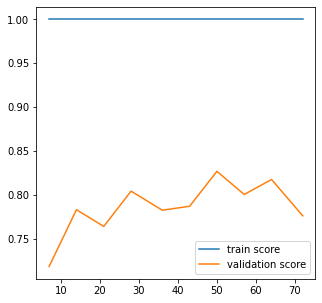

---------------------------------
AdaBoost
Accuracy =  0.75
-
[[ 8  3]
 [ 3 10]]
-
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.77      0.77      0.77        13

    accuracy                           0.75        24
   macro avg       0.75      0.75      0.75        24
weighted avg       0.75      0.75      0.75        24

-


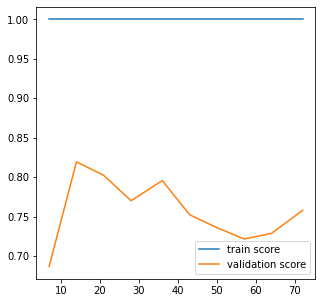

---------------------------------
SVM
Accuracy =  0.75
-
[[ 7  4]
 [ 2 11]]
-
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.73      0.85      0.79        13

    accuracy                           0.75        24
   macro avg       0.76      0.74      0.74        24
weighted avg       0.75      0.75      0.75        24

-


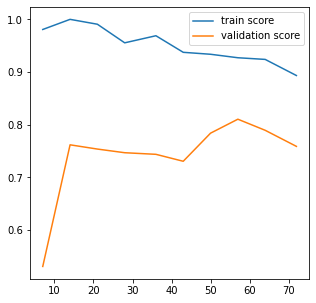

---------------------------------
KNN
Accuracy =  0.75
-
[[ 7  4]
 [ 2 11]]
-
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.73      0.85      0.79        13

    accuracy                           0.75        24
   macro avg       0.76      0.74      0.74        24
weighted avg       0.75      0.75      0.75        24

-


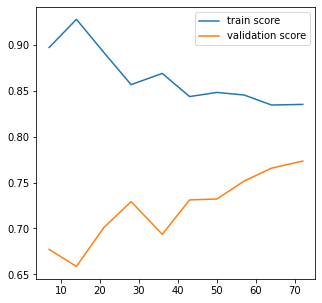

---------------------------------
LR
Accuracy =  0.9583333333333334
-
[[10  1]
 [ 0 13]]
-
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.93      1.00      0.96        13

    accuracy                           0.96        24
   macro avg       0.96      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24

-


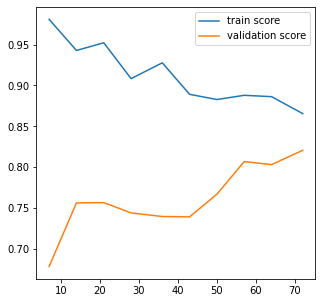

In [ ]:
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation(model)

## Using RandomForest

In [ ]:
RandomPipeline.fit(X_train, y_train)
y_proba = RandomPipeline.predict_proba(X_test)
y_pred = np.argmax(y_proba,axis=1)
print("RandomForest : ", accuracy_score(y_test, y_pred))

RandomForest :  0.8333333333333334


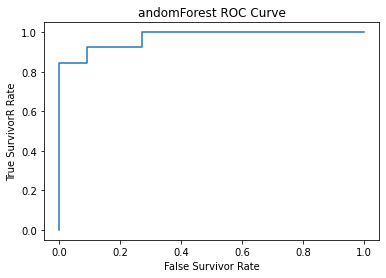

In [ ]:
y_pred_prob = RandomPipeline.predict_proba(X_test)[:,1]

fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='RandomForest ROC Curve')
plt.xlabel("False Survivor Rate")
plt.ylabel("True SurvivorR Rate")
plt.title("andomForest ROC Curve")
plt.show()

### Optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
RandomPipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'randomforestclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__minmaxscaler', 'pipeline__minmaxscaler__copy', 'pipeline__minmaxscaler__feature_range', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_s

In [ ]:
hyper_params = {
    'randomforestclassifier__n_estimators':[10,100,150,250,400,600],
    'randomforestclassifier__criterion':['gini','entropy'],
    'randomforestclassifier__min_samples_split':[2,6,12],
    'randomforestclassifier__min_samples_leaf':[1,4,6,10],
    'randomforestclassifier__max_features':['auto','srqt','log2',int,float],
    'randomforestclassifier__n_jobs':[-1],
    'randomforestclassifier__verbose':[0,1,2],
    'randomforestclassifier__class_weight':['balanced','balanced_subsample'],
    'randomforestclassifier__n_jobs':[-1],
}

In [ ]:
RF_grid = RandomizedSearchCV(RandomPipeline,hyper_params,scoring='accuracy',n_iter=40)
RF_grid.fit(X_train,y_train)
ypred = RF_grid.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_

In [ ]:
print(classification_report(y_test,ypred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.92      0.96        13

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

0.8333333333333334


## Using KNN

Text(0, 0.5, 'Mean Err')

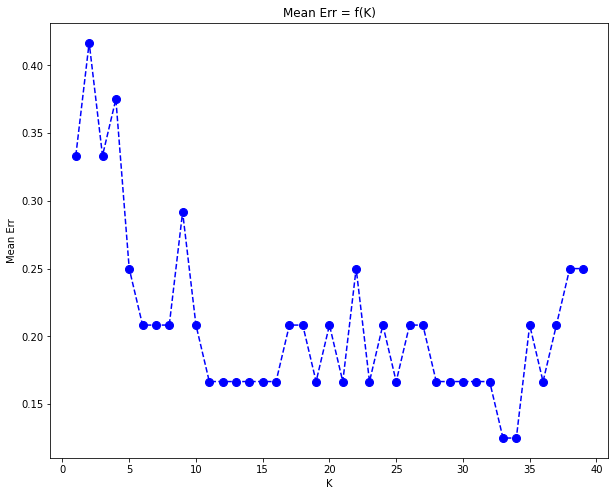

In [ ]:
err = []
  
for i in range(1, 40):
    
    model = make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors = i))
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    err.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 8))
plt.plot(range(1, 40), err, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='blue', markersize = 8)
  
plt.title('Mean Err = f(K)')
plt.xlabel('K')
plt.ylabel('Mean Err')

In [ ]:
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors = 34))
KNNPipeline.fit(X_train, y_train)
y_proba = KNNPipeline.predict_proba(X_test)
y_pred = np.argmax(y_proba,axis=1)
print("KNN : ", accuracy_score(y_test, y_pred))

KNN :  0.875


## Using XGBoost

Accuracy =  0.9166666666666666
-
[[10  1]
 [ 1 12]]
-
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.92      0.92        13

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24

-


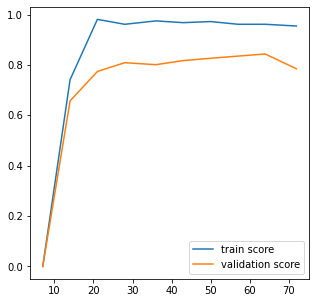

In [ ]:
import xgboost as xgb
gbm = xgb.XGBClassifier(
     learning_rate = 0.02,
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     #gamma=1,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     eval_metric = 'logloss',
     nthread= -1,
     scale_pos_weight=1).fit(X_train, y_train)
evaluation (gbm)

## Using SVM

In [ ]:
SVMPipeline.fit(X_train, y_train)
y_proba = SVMPipeline.predict_proba(X_test)
y_pred = np.argmax(y_proba,axis=1)
SVM_score = accuracy_score(y_test, y_pred)
print("SVM : ", SVM_score)

SVM :  0.75


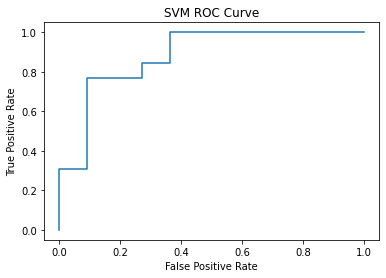

In [ ]:
y_pred_prob = SVMPipeline.predict_proba(X_test)[:,1]

fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='SVM ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.show()

In [ ]:
SVMPipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'svc', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__minmaxscaler', 'pipeline__minmaxscaler__copy', 'pipeline__minmaxscaler__feature_range', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [ ]:
from sklearn.utils.fixes import loguniform

hyper_params = {
    'svc__C': loguniform(1e0, 1e3),
    'svc__gamma': loguniform(1e-4, 1e-3),
    'svc__kernel': ['rbf'],
    'svc__class_weight':['balanced', None]
               }

In [ ]:
SVM_grid = RandomizedSearchCV(SVMPipeline,hyper_params,scoring='accuracy',n_iter=40)
SVM_grid.fit(X_train,y_train)
ypred = SVM_grid.predict(X_test)
SVM_score = accuracy_score(y_test, y_pred)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.87      1.00      0.93        13

    accuracy                           0.92        24
   macro avg       0.93      0.91      0.91        24
weighted avg       0.93      0.92      0.92        24



# Best Estimator
## We saw that **RandomForest** goes up to 96% accuracy on the testset

# Tuning Threshold

In [ ]:
best_classifier = RF_grid

thresholds = [0.3,0.4,0.5,0.6,0.7,0.8]
best_t = 0.3
best_acc = 0
for t in thresholds:
    y_pred = (best_classifier.predict_proba(X_test)[:,1] >= t).astype(int)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc=acc
        best_t=t
print('Accuracy on test set :',round(best_acc*100),"%")
print('Best threshold :',best_t)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

Accuracy on test set : 96 %
Best threshold : 0.5


#### Default threshold is good

# Final accuracy : 96%

# If you like please upvote !
## Also check my other notebooks :
#### 🔎EDA & Modelling🔮 - 🐁Mice Trisomy (100% acc.) : https://www.kaggle.com/dorianvoydie/eda-modelling-mice-100-acc
#### 🔎EDA & Modelling🔮 - 🩺🎗️Breast Cancer Detection : https://www.kaggle.com/dorianvoydie/eda-modelling-breast-cancer-detection
#### 🌦🌡 Weather Forecasting 📈 (98% acc.) : https://www.kaggle.com/dorianvoydie/weather-forecasting-98-acc
#### 🔎EDA & Modelling🔮 - Heart Attack 🩺💓 (90% Acc.) : https://www.kaggle.com/dorianvoydie/eda-modelling-heart-attack-90-accuracy-score
#### 🔎EDA & Modelling🔮 - Mobile price (95.5% acc.) : https://www.kaggle.com/dorianvoydie/eda-modelling-95-5-acc-mobile-price
#### 🔎EDA & Modelling🔮 - 🩺🧠 Stroke (74% acc.) : https://www.kaggle.com/dorianvoydie/eda-modelling-stroke-74-acc
#### ⚡🐲 Pokemon Stats 🥊✨ : https://www.kaggle.com/dorianvoydie/pokemon-stats
#### 🐟Fish Classification - Using CNN🔮 (97% acc.) : https://www.kaggle.com/dorianvoydie/fish-classification-using-cnn-97-acc
#### 💉👩‍⚕️ Vaccine & COVID-19 Indicators📈 : https://www.kaggle.com/dorianvoydie/vaccine-covid-19-indicators